# Pandas(part3)

## csv ایجاد فایل 

In [9]:
import csv

# تعریف ستون‌ها
fields = ['Name', 'Species', 'Weight', 'Power', 'Habitat','bird']

# داده‌های جدول
animals = [
    ["Lion", "Feline", "200 kg", "Hunting", "Africa", "No"],
    ["Elephant", "Elephantidae", "5000 kg", "High strength", "Africa and Asia", "No"],
    ["Gorilla", "Primates", "180 kg", "Intelligence", "African jungles", "No"],
    ["Crocodile", "Reptiles", "1000 kg", "Strong swimming ability", "Aquatic regions", "No"],
    ["Penguin", "Birds", "Varies", "Adaptability to cold climates", "Various regions", "Yes"],
    ["Polar Bear", "Mammals", "Up to 1600 kg", "Survival in Arctic conditions", "Arctic regions", "No"],
    ["Bison", "Mammals", "400-1000 kg", "Herding behavior", "North America, Europe, and Asia", "No"],
    ["Python", "Reptiles", "Varies", "Powerful constriction", "Tropical and subtropical regions", "No"],
    ["Donkey", "Mammals", "200-450 kg", "Load-carrying capacity", "Various regions", "No"],
    ["Eagle", "Birds", "Varies", "Excellent vision and flight", "Various regions", "Yes"],
    ["Ostrich", "Birds", "100-150 kg", "Fast running speed", "Africa", "Yes"],
    ["Hummingbird", "Birds", "2-20 grams", "Hovering flight", "Americas", "Yes"]
]
# CSV نام فایل 
filename = 'animals.csv'

# CSV نوشتن داده‌ها در فایل 
with open(filename, 'w', newline='') as csvfile:
    # ایجاد شیء و نوشتن داده‌ها
    csvwriter = csv.writer(csvfile)
    
    # نوشتن ستون‌ها
    csvwriter.writerow(fields)
    
    # نوشتن ردیف‌های داده
    csvwriter.writerows(animals)

print("CSV File successfully created")

# توجه : اطلاعات این جدول رو خودم پیدا کردم از اینترنت شاید غلط داشته باشه ولی این جا مهم اون عملیات هست

CSV File successfully created


## هدف : کنار هم قرار دادن ستون اسم سیاره ها و ستون نام حیوانات در یک دیتافریم جداگانه

In [10]:
import pandas as pd

# خواندن دو فایل
planets = pd.read_csv('plantes.csv')
animals = pd.read_csv('animals.csv')

# pd.merge() : برای ادغام دو دیتافریم براساس یک ستون یا چندین ستون مشترک استفاده می‌شود

planet_names = planets[['Name']]
animals_names = animals[['Name']]


merged_name_df = planet_names.merge(animals_names, left_index=True, right_index=True, suffixes=('_planets', '_animals'))
merged_name_df

# left_index=True, right_index=True : 
# برای ادغام، از ایندکس‌های ردیف‌ها به عنوان معیار استفاده کند. به این معنی که به جای ادغام بر اساس ستون‌ها، از ایندکس‌ها استفاده شود

# suffixes=('_planets', '_animals'):
# است x,y اسم سر ستون ها رو از اون لیست بالا میگیره اگر مثل هم باشند خودش یک پسوند در نظر میگیره و پیشفرض هم 


,Name_planets,Name_animals
0,Sun,Lion
1,Mercury,Elephant
2,Venus,Gorilla
3,Earth,Crocodile
4,Moon,Penguin
5,Mars,Polar Bear
6,Phobos,Bison
7,Deimos,Python
8,Jupiter,Donkey
9,Saturn,Eagle


# هدف : انتخاب چند ستون از هر جدول 

In [11]:
planet_names = planets[['Name','Mass (kg)']] # انتخاب دو ستون 
animals_names = animals[['Name']] # انتخاب یک ستون

merged_name_df = planet_names.merge(animals_names, left_index=True, right_index=True, suffixes=('_planets', '_animals'))
merged_name_df


,Name_planets,Mass (kg),Name_animals
0,Sun,1.989000e+30,Lion
1,Mercury,3.285000e+23,Elephant
2,Venus,4.867000e+24,Gorilla
3,Earth,5.972000e+24,Crocodile
4,Moon,7.342000e+22,Penguin
5,Mars,6.390000e+23,Polar Bear
6,Phobos,1.072000e+16,Bison
7,Deimos,2.400000e+15,Python
8,Jupiter,1.898000e+27,Donkey
9,Saturn,5.680000e+26,Eagle


## هدف : نوشتن نام ستون سیاره ها به همراه تاریخ کشف مقابل آن ولی به صورت تاریخ دقیق 

In [12]:
# pd.to_datetime : برای تبدیل مقادیر به فرمت تاریخ و زمان مورد استفاده قرار می‌گیرد. این تابع عموماً برای تبدیل ستون‌های مرتبط با تاریخ و زمان در یک دیتا فریم به یک فرمت مناسب و داده‌نویسی به این شیوه استفاده می‌شود
# Not a Timestamp" ----> NaT معادل Nan  نشان‌دهنده مقادیر نامعتبر یا مقادیر خالی در مفهوم تاریخ و زمان

# به فرمت تاریخ و زمان "Discovery Date"تبدیل ستون  
planets['Discovery Date'] = pd.to_datetime(planets['Discovery Date'], format='%Y', errors='coerce') # پارامتر آخر به منظور کنترل رفتار تبدیل تاریخها به دیتافریم استفاده می شود

#به عنوان تاریخ و زمان "Discovery Date" نمایش  ستون
planets[['Name', 'Discovery Date']]

,Name,Discovery Date
0,Sun,NaT
1,Mercury,NaT
2,Venus,NaT
3,Earth,NaT
4,Moon,NaT
5,Mars,NaT
6,Phobos,1877-01-01
7,Deimos,1877-01-01
8,Jupiter,NaT
9,Saturn,NaT


In [13]:
# مثال دیگر 

data = {'date': ['2023-11-07', '2023-11-08', 'InvalidDate']}
df = pd.DataFrame(data)

# تبدیل ستون "تاریخ" به فرمت تاریخ و زمان
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
print(df)

# errors حالت های پارامتر  : 
# 1- coerce : تبدیل می کند NaT تاریخ‌های نامعتبر را به  معادل با مقدار تاریخ نامعتبر در 
# 2- raise  : ایجاد می شود ValueError  اگر تاریخی نامعتبر وجود داشته باشد، یک خطای 
# 3- ignore : تاریخ‌های نامعتبر را نادیده می‌گیرد و به صورت اصلی باقی می‌مانند


        date
0 2023-11-07
1 2023-11-08
2        NaT


### هدف :ساخت یک جدول بر اساس تحلیل تعداد کل ماه‌ها و جمع جرم‌ها بر حسب نام کاشف

In [14]:
pivot_result = planets.pivot_table(index="Discoverer's Name", values=['Number of Moons', 'Name'], aggfunc={'Number of Moons': 'sum', 'Name': lambda x: ' - '.join(x)})
pivot_result

,Name,Number of Moons
Discoverer's Name,,
Asaph Hall,Phobos - Deimos,0.0
Christiaan Huygens,Mars,2.0
Galileo Galilei,Mercury - Venus - Jupiter - Saturn,161.0
Urbain Le Verrier and Johann Galle,Neptune,14.0
William Herschel,Uranus,27.0


--------------------------

# matplotlib رسمم نمودار ها به کمک 
## نمایش نمودار خطی

# هدف : بررسی رابطه بین تعداد قمر و فاصله از خورشید

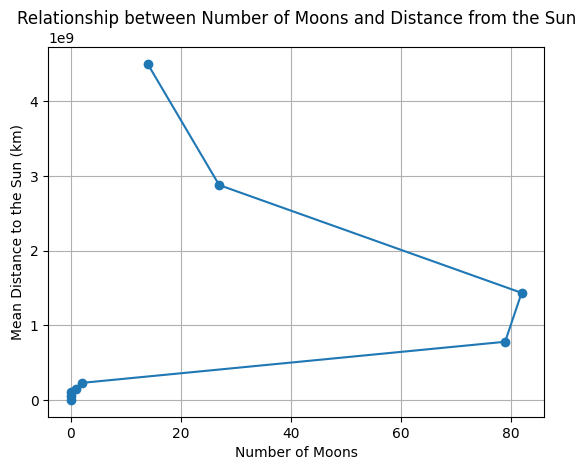

In [26]:
import matplotlib.pyplot as plt

# حذف موارد خالی از ستون‌های مورد نظر
planets_clean = planets.dropna(subset=['Number of Moons', 'Mean Distance to the Sun (km)'])

# x و y انتخاب مقادیر مناسب برای 
x_column = 'Number of Moons'
y_column = 'Mean Distance to the Sun (km)'

x = planets_clean[x_column]
y = planets_clean[y_column]

# رسم نمودار خطی
plt.plot(x, y, marker='o', linestyle='-')

# تنظیم عنوان و مشخصات محور‌ها
plt.title('Relationship between Number of Moons and Distance from the Sun')
plt.xlabel('Number of Moons')
plt.ylabel('Mean Distance to the Sun (km)')

plt.grid(True)

# نمایش نمودار
plt.show()


## نمایش نمودار میله‌ای

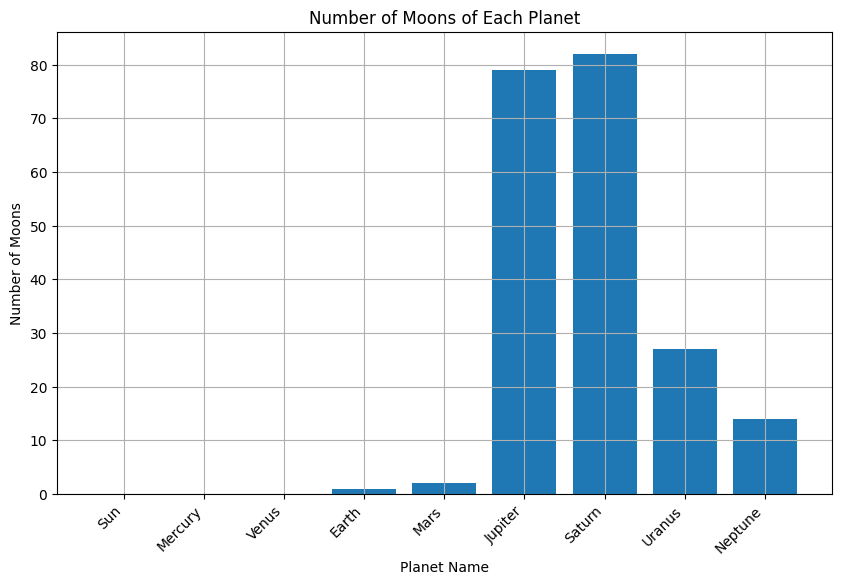

In [28]:
x = 'Name'
y = 'Number of Moons'

# تبدیل نوع داده‌ای ستون‌ها به عددی
len_y = planets[y].astype(float)

# رسم نمودار میله‌ای
plt.figure(figsize=(10, 6))
plt.bar(planets[x], len_y)

# تنظیمات نمودار
plt.title('Number of Moons of Each Planet')
plt.xlabel('Planet Name')
plt.ylabel('Number of Moons')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# نمایش نمودار
plt.show()


#  نمایش نمودار دایره‌ای
# هدف: نمودار دایره‌ای نمایش درصد تعداد ماه‌های هر سیاره بر اساس نام کاشف


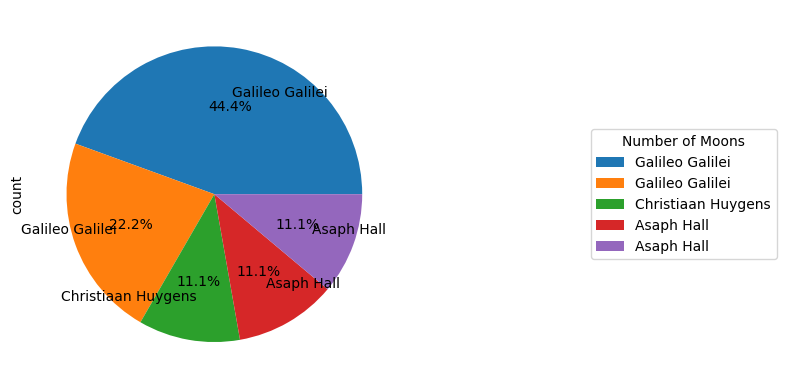

In [17]:

x = "Discoverer's Name"

# از ستون مربوط به نام کاشف NaN حذف مقادیر  
non_nan_discoverers = planets[x].dropna()

# محاسبه تعداد سیارات کشف شده بر اساس هر کاشف
discoverer_counts = non_nan_discoverers.value_counts()

labels = planets["Discoverer\'s Name"] .dropna() # Nan ستون نام ها به جز 

labeldistance = .6  # تغییر فاصله راهنمای درصدها، نشان‌دهنده فاصله بین مرکز نمودار دایره‌ای و متن‌های نمایش درصدها می‌باشد

discoverer_counts.plot(kind='pie', labels=labels,autopct='%1.1f%%', labeldistance=0.7, legend=True)
plt.legend(title=y, loc='center left', bbox_to_anchor=(1.5, 0.5)) # برای تنظیم راهنما که کجا باشه

'''
    Auto Percent Format (autopct):
    '%': نمایش نسبت درصد با علامت درصد ("%")
    '1.1f': یک عدد معیار ممیز (float) با یک رقم معنی دار در بخش اعشار و یک رقم در بخش قبل از ممیز نمایش بده
    %%: نمایش علامت درصد با دو درصد پشت هم ("%")
    
    autopct='%1.1f%%': فرمت نمایش درصد با یک رقم معنی دار در بخش اعشار و یک رقم در بخش قبل از ممیز
    
'''
plt.show()

## نمایش نمودار پراکندگی

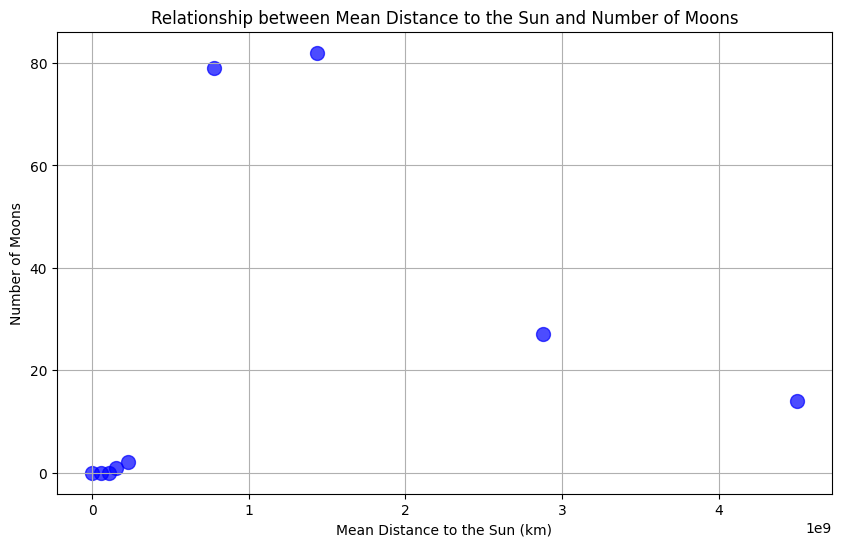

In [29]:
import matplotlib.pyplot as plt

# مشخصات نمودار
x = 'Mean Distance to the Sun (km)'
y = 'Number of Moons'

# رسم نمودار پراکندگی
plt.figure(figsize=(10, 6))
plt.scatter(planets[x], planets[y], color='blue', alpha=0.7, s=100)  # s: اندازه نقاط | alpha : میزان شفافیت

# تنظیمات نمودار
plt.title('Relationship between Mean Distance to the Sun and Number of Moons')
plt.xlabel('Mean Distance to the Sun (km)')
plt.ylabel('Number of Moons')
plt.grid(True)

# نمایش نمودار
plt.show()


# سری زمانی

        date  data
0 2023-01-01    91
1 2023-01-02    37
2 2023-01-03    14
3 2023-01-04    24
4 2023-01-05    35


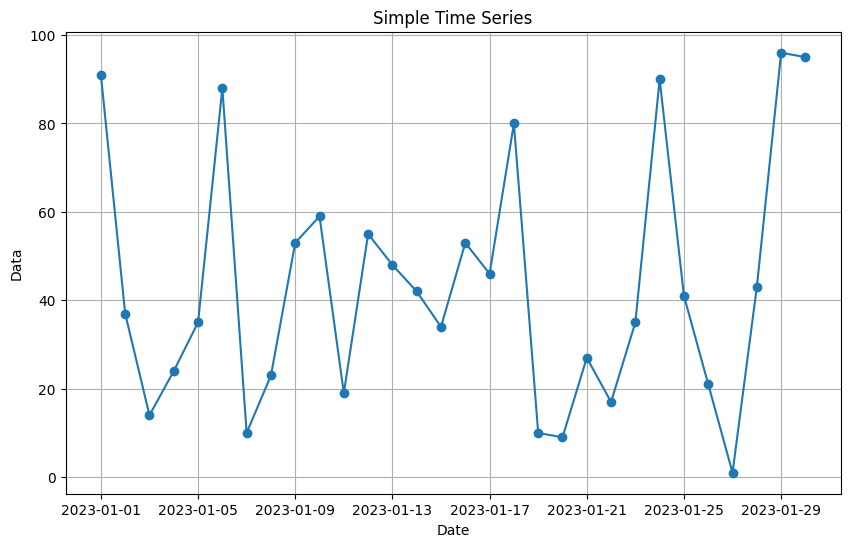

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# تولید یک دنباله زمانی با فاصله زمانی روزانه به مدت 30 روز
date_rng = pd.date_range(start='2023-01-01', end='2023-01-30', freq='D')

# ایجاد یک DataFrame ساده با ستون زمانی و یک ستون داده
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0, 100, size=(len(date_rng)))

# نمایش اطلاعات ابتدایی از DataFrame
print(df.head())

# ترسیم سری زمانی
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['data'], marker='o')
plt.title('Simple Time Series')
plt.xlabel('Date')
plt.ylabel('Data')
plt.grid(True)
plt.show()
